# Exercise 1

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
raw_data = pd.read_csv("matrix_1kg.txt",
                       sep = "\t")
raw_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sub_data = raw_data.iloc[:, 4:]
sub_data

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
average = sub_data.sum(axis=1) / 2548
average

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [155]:
alt_freq = average / 2
alt_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

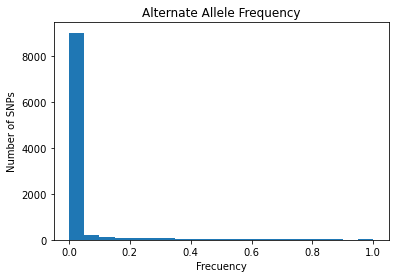

In [156]:
fig, ax = plt.subplots()
ax.hist(alt_freq, bins=20)
plt.title("Alternate Allele Frequency")
plt.xlabel("Frecuency")
plt.ylabel("Number of SNPs")
plt.show()

# Exercise 2

In [157]:
Min = alt_freq > 0.05
print(Min)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [163]:
Max = alt_freq < 0.95
print(Max)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool


In [164]:
variable = Min & Max
print(variable)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [168]:
common = sub_data.loc[variable,:]
common

      HG00096  HG00097  HG00099  HG00100  HG00101  HG00102  HG00103  HG00104  \
20          0        1        1        1        0        0        0        0   
32          1        2        1        1        1        1        0        0   
38          0        1        2        1        1        1        1        1   
41          0        1        0        0        0        0        0        0   
46          0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
9957        1        2        2        2        2        2        1        2   
9959        1        0        1        0        1        0        0        0   
9974        0        1        1        0        0        1        0        0   
9975        2        1        0        1        0        1        0        1   
9980        0        0        0        0        0        0        0        0   

      HG00105  HG00106  ...  NA21128  N

In [173]:
average2 = common.sum(axis=1) / 2548
average

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [174]:
alt_freq2 = average2 / 2
alt_freq2

20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

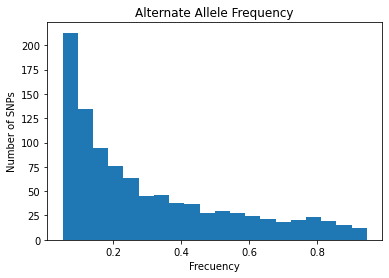

In [175]:
fig, ax = plt.subplots()
ax.hist(alt_freq2, bins=20)
plt.title("Alternate Allele Frequency")
plt.xlabel("Frecuency")
plt.ylabel("Number of SNPs")
plt.show()

# Exercise 3

In [21]:
raw_data

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
sub_data1 = raw_data.drop(['POS', 'REF','ALT'], axis=1)
print(sub_data1)

      CHROM  HG00096  HG00097  HG00099  HG00100  HG00101  HG00102  HG00103  \
0     chr21        0        0        0        0        0        0        0   
1     chr21        0        0        1        0        0        0        0   
2     chr21        0        0        0        0        0        0        0   
3     chr21        0        0        0        0        0        0        0   
4     chr21        0        0        0        0        0        0        0   
...     ...      ...      ...      ...      ...      ...      ...      ...   
9995  chr21        0        0        0        0        0        0        0   
9996  chr21        0        0        0        0        0        0        0   
9997  chr21        0        0        0        0        0        0        0   
9998  chr21        0        0        0        0        0        0        0   
9999  chr21        0        0        0        0        0        0        0   

      HG00104  HG00105  ...  NA21128  NA21129  NA21130  NA21133

In [23]:
sub_data1.median(axis = 1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Length: 10000, dtype: float64

In [24]:
roi = sub_data1.median(axis = 1) > 0
roi

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [25]:
sub_data2 = sub_data1.loc[roi, :]
sub_data2

,CHROM,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
32,chr21,1,2,1,1,1,1,0,0,0,...,1,1,2,0,0,0,1,1,1,0
38,chr21,0,1,2,1,1,1,1,1,1,...,0,1,0,1,1,1,1,2,0,1
54,chr21,0,1,1,1,2,0,0,1,1,...,1,0,2,1,2,0,0,0,2,2
98,chr21,2,1,2,0,0,0,1,0,1,...,2,0,1,0,1,0,1,2,0,0
107,chr21,1,1,1,2,0,0,2,1,2,...,0,2,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,chr21,0,0,1,1,1,0,1,1,0,...,2,1,1,1,1,0,0,1,0,1
9927,chr21,0,1,0,0,0,1,0,1,0,...,0,0,0,1,1,2,0,1,1,1
9929,chr21,2,0,1,1,2,0,1,1,2,...,1,0,0,1,1,2,2,0,1,1
9957,chr21,1,2,2,2,2,2,1,2,2,...,2,2,2,2,2,2,2,2,1,2


In [26]:
df_metadata = pd.read_csv("GTEx.txt", sep = "\t")
df_metadata

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMTSISCH,SMNABTCH,SMNABTCHT,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,GTEX-N7MS-0007-SM-26GME,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-N7MS-0007-SM-26GMV,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-N7MS-0007-SM-2D43E,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GTEX-N7MS-0007-SM-2D7W1,NaN,C1,NaN,8.2,Blood,Whole Blood,16-19 hours,BP-16653,RNA isolation_PAXgene Blood RNA (Manual),...,13772179.0,18422595.0,0.002456,13504096.0,49.508575,0.041526,0.835199,852.0,0.563503,51.355957
4,GTEX-N7MS-0009-SM-2BWY4,NaN,C1,NaN,NaN,Blood,Whole Blood,16-19 hours,BP-16657,DNA isolation_Whole Blood _QIAGEN Puregene (Ma...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,K-562-SM-3NMAP,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,22545176.0,24349348.0,0.003103,22649108.0,50.114986,0.018574,0.936381,897.0,0.284208,50.118595
3053,K-562-SM-3NMDG,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,20755972.0,22511288.0,0.002659,20865295.0,50.131330,0.017522,0.950120,868.0,0.267642,50.126090
3054,K-562-SM-3P61Y,NaN,NaN,NaN,9.5,Bone Marrow,Cells - Leukemia cell line (CML),NaN,BP-17177,RNA isolation_Trizol Manual (Cell Pellet),...,23599904.0,25524851.0,0.002788,23712745.0,50.119250,0.022186,0.946919,889.0,0.257213,50.105167
3055,NA12878-SM-2XJZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cell Line DNA (Derived from Blood Cells),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_metadata = df_metadata[["SAMPID", "SMTS"]]
df_metadata

,SAMPID,SMTS
0,GTEX-N7MS-0007-SM-26GME,Blood
1,GTEX-N7MS-0007-SM-26GMV,Blood
2,GTEX-N7MS-0007-SM-2D43E,Blood
3,GTEX-N7MS-0007-SM-2D7W1,Blood
4,GTEX-N7MS-0009-SM-2BWY4,Blood
...,...,...
3052,K-562-SM-3NMAP,Bone Marrow
3053,K-562-SM-3NMDG,Bone Marrow
3054,K-562-SM-3P61Y,Bone Marrow
3055,NA12878-SM-2XJZN,NaN


In [28]:
pca_input = sub_data2.iloc[:, 2:]
pca_input

,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,HG00107,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
32,2,1,1,1,1,0,0,0,1,2,...,1,1,2,0,0,0,1,1,1,0
38,1,2,1,1,1,1,1,1,0,0,...,0,1,0,1,1,1,1,2,0,1
54,1,1,1,2,0,0,1,1,2,1,...,1,0,2,1,2,0,0,0,2,2
98,1,2,0,0,0,1,0,1,0,1,...,2,0,1,0,1,0,1,2,0,0
107,1,1,2,0,0,2,1,2,1,1,...,0,2,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,0,1,1,1,0,1,1,0,1,0,...,2,1,1,1,1,0,0,1,0,1
9927,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,1,2,0,1,1,1
9929,0,1,1,2,0,1,1,2,1,1,...,1,0,0,1,1,2,2,0,1,1
9957,2,2,2,2,2,1,2,2,1,2,...,2,2,2,2,2,2,2,2,1,2


In [29]:
pca_input = pca_input.T
pca_input

,32,38,54,98,107,116,164,165,182,190,...,9837,9841,9846,9847,9873,9913,9927,9929,9957,9975
HG00097,2,1,1,1,1,1,1,1,1,0,...,2,2,2,2,1,0,1,0,2,1
HG00099,1,2,1,2,1,1,1,0,0,0,...,2,2,2,2,2,1,0,1,2,0
HG00100,1,1,1,0,2,0,0,2,0,1,...,0,1,2,1,2,1,0,1,2,1
HG00101,1,1,2,0,0,2,1,1,1,0,...,2,2,2,1,2,1,0,2,2,0
HG00102,1,1,0,0,0,1,1,2,0,1,...,0,2,2,2,1,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,1,0,0,1,1,2,1,1,0,...,2,2,2,2,1,0,2,2,2,1
NA21141,1,1,0,1,1,1,1,1,2,2,...,1,2,2,1,2,0,0,2,2,2
NA21142,1,2,0,2,0,1,1,2,1,1,...,1,1,2,1,1,1,1,0,2,2
NA21143,1,0,2,0,1,1,2,2,1,0,...,0,2,2,0,2,0,1,1,1,2


In [30]:
pca_input.mean(axis = 0)

32      1.191598
38      0.811543
54      0.893600
98      0.658814
107     1.331370
          ...   
9913    0.747154
9927    0.654888
9929    1.184138
9957    1.683942
9975    1.619945
Length: 392, dtype: float64

In [31]:
pca_input.var(axis = 0)

32      0.504517
38      0.525350
54      0.516169
98      0.464458
107     0.495807
          ...   
9913    0.550340
9927    0.470403
9929    0.500644
9957    0.286949
9975    0.349610
Length: 392, dtype: float64

In [32]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([-1.67052168e-15,  1.20853901e-15,  6.62036407e-16,  7.47210172e-16,
       -6.04977831e-16,  6.66779483e-16, -2.75550642e-16, -9.19693584e-16,
        5.22245075e-16,  1.15411759e-15,  6.98825894e-16, -6.84354200e-17,
       -7.83738123e-17,  4.94827317e-16,  8.25235269e-16, -4.88463259e-16,
       -1.24203749e-15,  3.66761544e-16, -1.17752512e-15, -4.21978467e-16,
        8.98029633e-16,  1.67871649e-15,  5.52191020e-16, -1.12308191e-15,
        4.54801315e-16, -1.03361458e-15,  1.91793534e-18,  1.07578737e-16,
        1.75142368e-16,  1.74157247e-15, -4.75735143e-16,  1.63706679e-15,
       -1.12798572e-15,  5.74552402e-16, -2.25444581e-16,  1.35012840e-15,
       -1.85385886e-15,  9.01952683e-16, -3.81276827e-16, -1.94040570e-15,
       -1.85691012e-16, -7.72927942e-16, -1.76480564e-15, -1.13193057e-15,
        0.00000000e+00,  7.61245972e-16, -2.76095510e-16, -3.95356216e-17,
       -3.60223128e-16,  1.28893973e-15, -4.79265888e-16, -2.14024148e-16,
        4.42868706e-16,  

In [33]:
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [34]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-3.52258251, -4.40066912, -0.40944138, ...,  0.31999835,
         2.80220168, -0.66050257],
       [-3.84804162, -5.88768174,  0.23182638, ...,  0.42290535,
        -1.77942913,  0.71923291],
       [-3.08262317, -4.72617754, -4.60688708, ..., -1.00941005,
        -0.33054772,  1.80680269],
       ...,
       [-2.39204918, -2.65179762, -1.3211065 , ...,  1.29368312,
         0.75804072,  1.93000971],
       [-4.5368154 , -1.15019869,  3.67110328, ...,  2.99402691,
         1.50812082,  2.85752375],
       [ 0.96598564, -0.21633774,  4.00698552, ..., -0.2763835 ,
         0.39660102,  1.19063006]])

In [35]:
pca_output.shape

(2547, 10)

In [36]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.522583,-4.400669,-0.409441,0.944050,2.929782,0.289076,3.314849,0.319998,2.802202,-0.660503
1,-3.848042,-5.887682,0.231826,-1.672659,0.611989,-0.615400,-1.960998,0.422905,-1.779429,0.719233
2,-3.082623,-4.726178,-4.606887,2.186305,2.621462,-1.144031,-3.248089,-1.009410,-0.330548,1.806803
3,-3.391846,-5.634707,4.480734,-0.312133,1.248065,2.467168,0.096641,1.752453,-3.013914,1.116109
4,-1.833810,-4.972646,2.269484,0.437027,1.797479,0.372358,1.536655,2.824255,0.057096,2.658591
...,...,...,...,...,...,...,...,...,...,...
2542,-3.504485,0.057450,0.694696,0.010514,-2.336475,-1.132275,-1.151439,1.402637,-0.389465,-3.215272
2543,-4.151818,-2.016462,-3.133792,-1.794606,-4.009080,2.676305,-2.443503,-0.393187,-0.638759,-0.025969
2544,-2.392049,-2.651798,-1.321107,-1.906010,-3.435248,0.021765,2.498770,1.293683,0.758041,1.930010
2545,-4.536815,-1.150199,3.671103,-3.313383,-3.556191,-0.404525,0.390198,2.994027,1.508121,2.857524


Text(0, 0.5, 'PCA1')

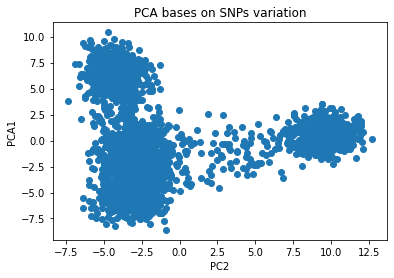

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
plt.title('PCA bases on SNPs variation')
plt.xlabel('PC2')
plt.ylabel('PCA1')